# Calculation of absorption of light in polymer solar cell

In [1]:
%matplotlib inline
import matplotlib.pylab as plt

import scipy.constants
from matplotlib import ticker
import numpy as np

import oedes
from oedes.optical.spectra import *
from oedes.optical import *
from oedes.optical import test_materials

In [2]:
front_layers = [
    IsotropicLayer(1e-3, test_materials.Glass),
    IsotropicLayer(50e-9, test_materials.ITO),
    IsotropicLayer(100e-9, test_materials.PEDOT_PSS)]
back_layers = [
    IsotropicLayer(50e-9, test_materials.Al)
]

In [3]:
L=np.linspace(0,500e-9,200)

In [4]:
@np.vectorize
def absorption(L):
    active_layer = IsotropicLayer(L, test_materials.P3HT_PC61BM)
    layers = front_layers + [active_layer] + back_layers
    return NormalIncidence(layers, AM1_5, AM1_5.xdata).total_absorption_in_layer(active_layer)

/swedata-jamnik/home/marek/projects/oedes-private/oedes/optical/transfer.py:153: RuntimeWarning: invalid value encountered in multiply
  delta = kz * thickness[..., np.newaxis]


Text(0,0.5,'Power absorbed in active layer [W/m^2]')

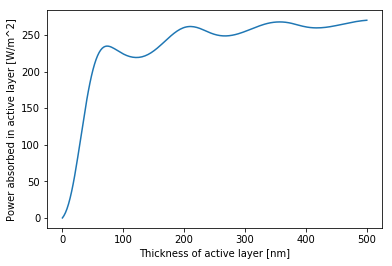

In [5]:
a=absorption(L)
oedes.testing.store(a)
plt.plot(L*1e9,a)
plt.xlabel('Thickness of active layer [nm]')
plt.ylabel('Power absorbed in active layer [W/m^2]')